<a href="https://colab.research.google.com/github/okcza515/TextPokerGame/blob/main/TextPokerGame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from IPython.display import Image, display
import os
import random

class PokerGame:
    CARD_IMAGES_PATH = "/content/drive/MyDrive/TextPokerGame/Card_PNG"

    def __init__(self, players):
        self.players = players
        self.deck = self.generate_deck()
        self.community_cards = []
        self.pot = 0
        self.numberFold = 0


    def generate_deck(self):
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
        deck = [{'rank': rank, 'suit': suit} for suit in suits for rank in ranks]
        random.shuffle(deck)
        return deck

    def load_card_image(self, card, size=(50, 75)):
        rank = card['rank']
        suit = card['suit'][0]  # Get the first letter of the suit

        # Example: Construct the file name for the image (e.g., '10C.png', 'AH.png')
        image_name = f"{rank.upper()}{suit.upper()}.png"
        image_path = os.path.join(self.CARD_IMAGES_PATH, image_name)

        # Display the resized image in Colab
        try:
            display(Image(filename=image_path, width=size[0], height=size[1]))
        except FileNotFoundError:
            print(f"Image not found for {rank} of {card['suit']}")

    def deal_community_card(self):
        community_card = self.deck.pop()
        self.community_cards.append(community_card)
        self.load_card_image(community_card)

    def deal_cards(self):
        for player in self.players:
            player.hand = [self.deck.pop(), self.deck.pop()]

    def display_hand(self, player):
        print(f"\n{player.name}'s hand:")
        for card in player.hand:
            self.load_card_image(card)

    def display_community_cards(self):
        print("\nCommunity Cards:")
        for card in self.community_cards:
            self.load_card_image(card)

    def get_user_bet(self, player):
        while True:
            try:
                bet = int(input(f"{player.name}, enter your bet: \n"))
                if bet >= 0 and bet <= player.chips:
                    return bet
                else:
                    print("Invalid bet. Please enter a valid amount.\n")
            except ValueError:
                print("Invalid input. Please enter a number.\n")

    def player_turn(self, player):
        print(f"\n{player.name}'s turn:")
        self.display_community_cards()
        self.display_hand(player)

        # Add logic for player actions (e.g., bet, fold, etc.)
        # For simplicity, let's assume players can only bet or fold.

        if player.hasFold == 1:
          pass
        else:
            action = input("Do you want to (B)et or (F)old? \n").upper()
            if action == 'B':
              bet = self.get_user_bet(player)
              player.chips -= bet
              self.pot += bet
            elif action == 'F':
              # Player folds, implement fold logic if needed
              player.hasFold = 1
              self.numberFold +=1
              pass
            else:
              print("Invalid action. Please enter 'B' to bet or 'F' to fold.\n")

    def evaluate_winner(self):
        # Add logic to evaluate the winner based on hand strength (e.g., check for pairs, straights, etc.)
        # This can be a complex part of the project.
        pass

    def play_round(self):
        self.deal_cards()
        for i in range(5):  # Deal 5 community cards
            flag = False
            for player in self.players:
                self.player_turn(player)
                if self.numberFold == len(players) - 1:
                  flag = True
                  break
            if flag:
              break
            self.deal_community_card()
            self.display_community_cards()

        # Show all cards
        print("\n=======================================\nShowdown:")
        self.display_community_cards()
        for player in self.players:
            self.display_hand(player)

        self.evaluate_winner()

class Player:
    def __init__(self, name, chips=1000):
        self.name = name
        self.hand = []
        self.hasFold = 0
        self.chips = chips


Player 1's turn:

Community Cards:

Player 1's hand:


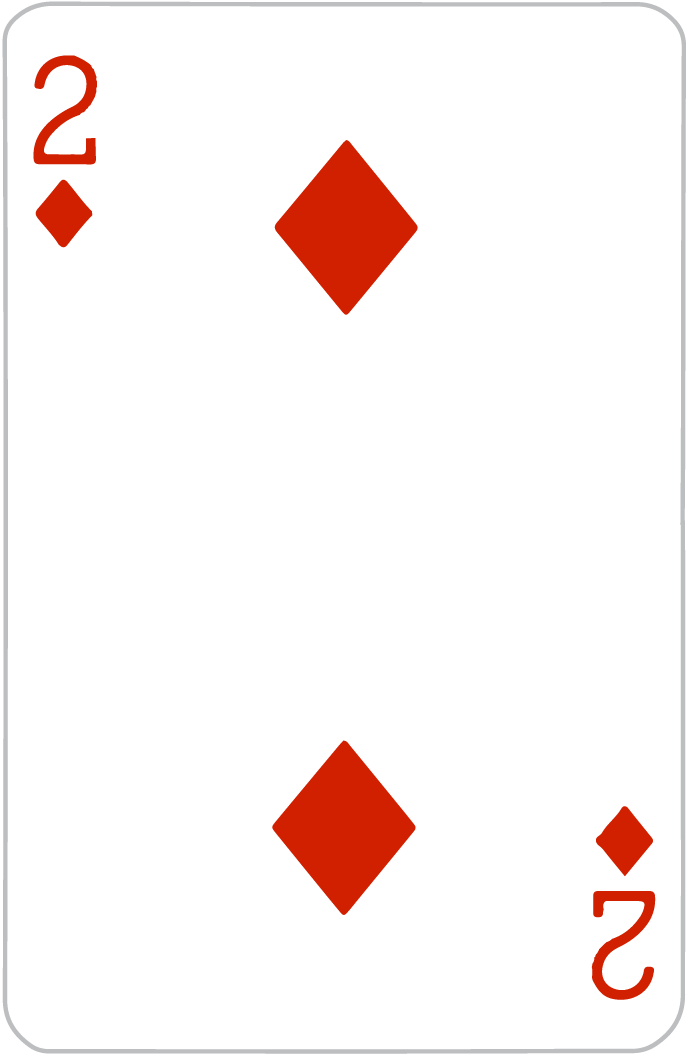

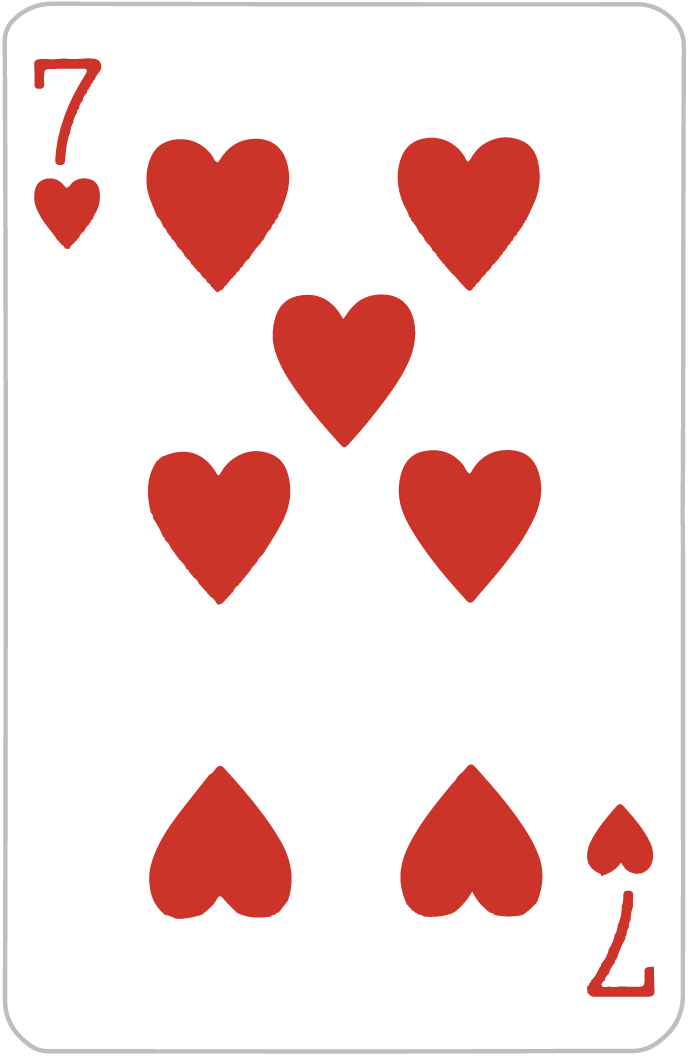

Do you want to (B)et or (F)old? 
B
Player 1, enter your bet: 
50

AI Bot's turn:

Community Cards:

AI Bot's hand:


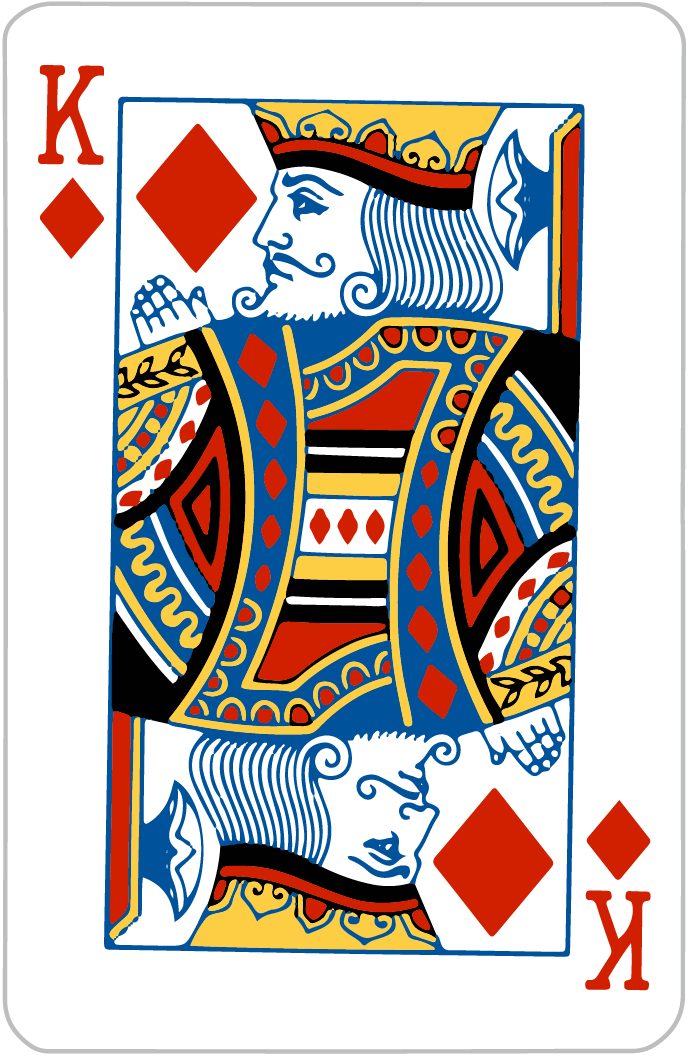

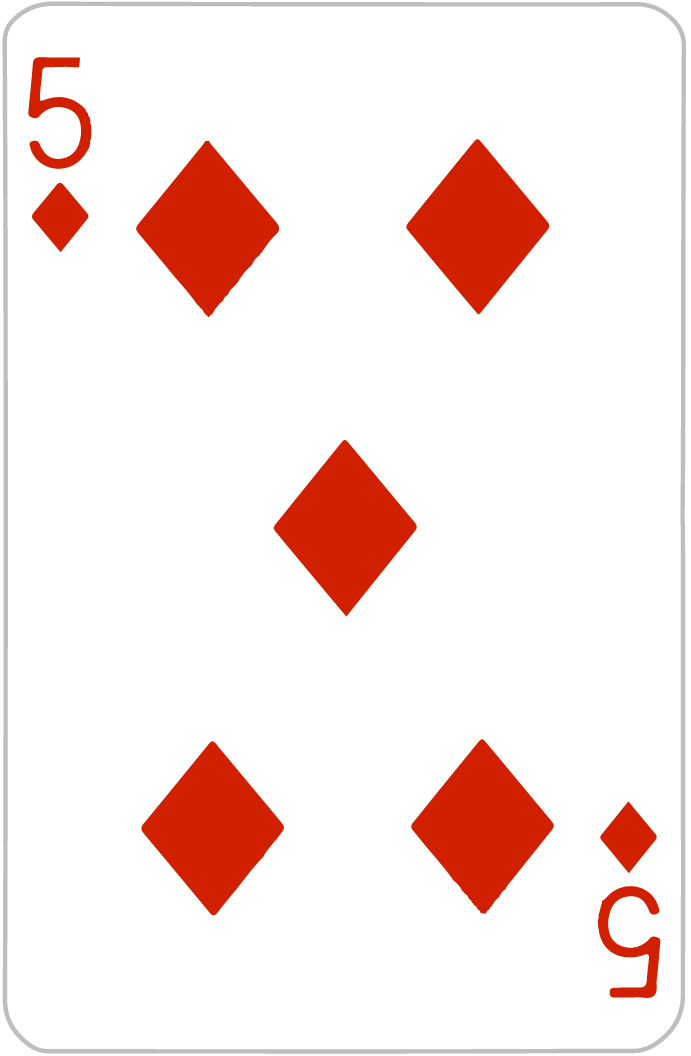

Do you want to (B)et or (F)old? 
B
AI Bot, enter your bet: 
50


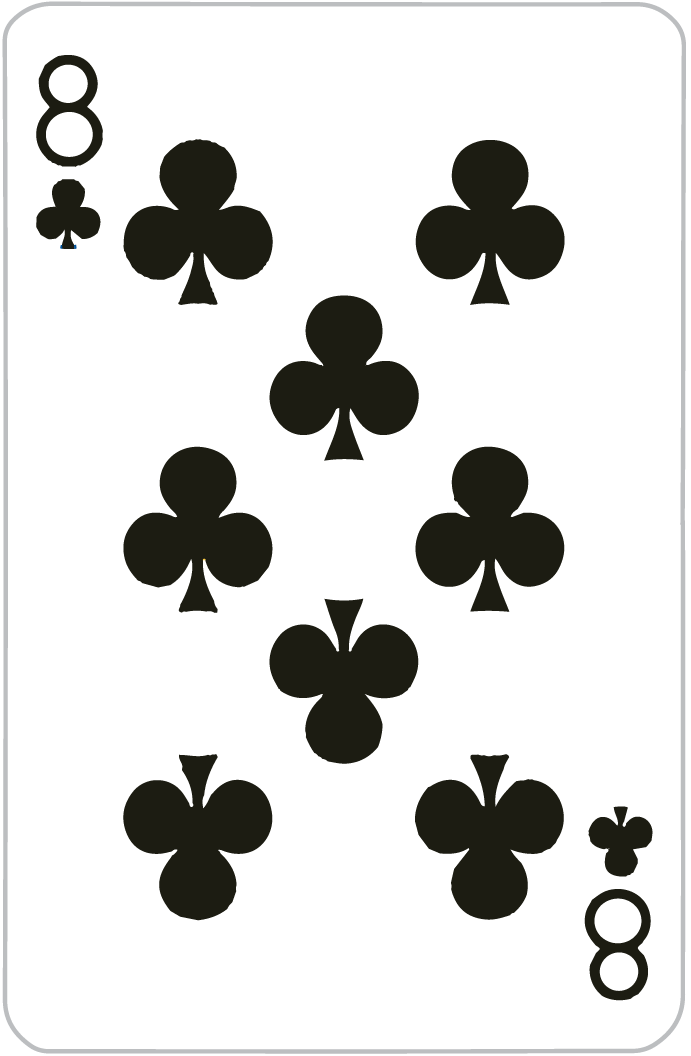


Community Cards:


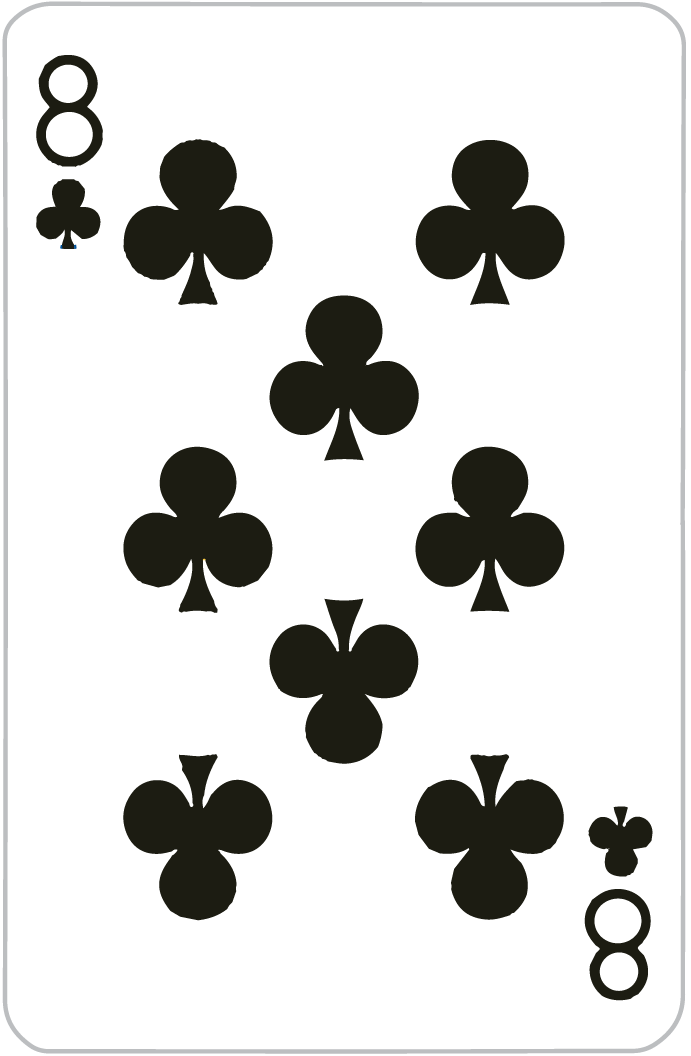


Player 1's turn:

Community Cards:


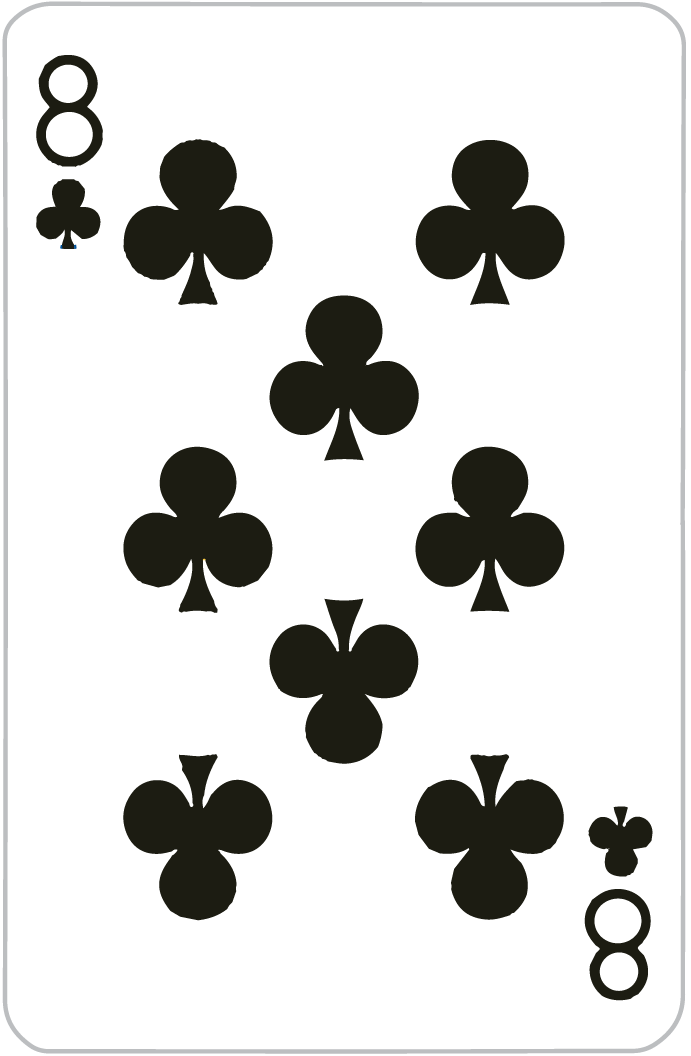


Player 1's hand:


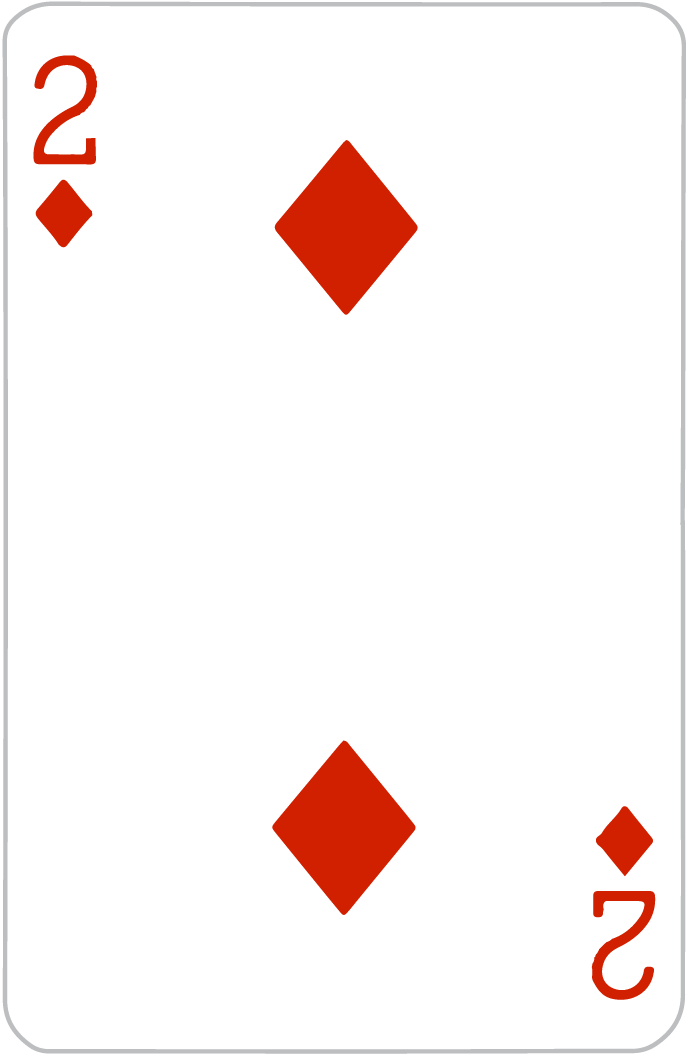

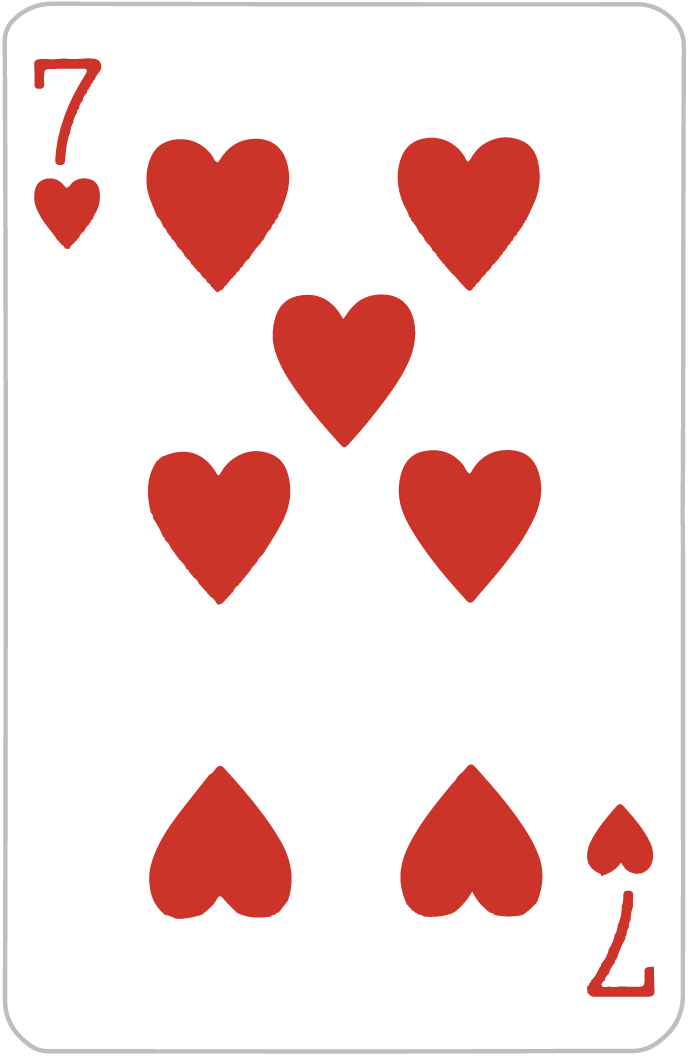

KeyboardInterrupt: ignored

In [46]:
# Example usage
player1 = Player("Player 1")
player2 = Player("AI Bot")
players = [player1, player2]

game = PokerGame(players)
game.play_round()
